# Data Exploratory Analysis (EDA)

We will perform Exploratory Data Analysis (EDA) on each dataset derived from the ETL process. Upon completion of this phase, we will have gained a comprehensive understanding that will facilitate decision-making regarding the features selected to train our recommendation model. This systematic approach ensures a detailed understanding of the datasets, enabling an informed selection of the most relevant variables in the context of model development.

In [3]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Data upload
df_games = pd.read_parquet('datasets/processed/games.parquet')
df_items = pd.read_parquet('datasets/processed/items.parquet')
df_reviews = pd.read_parquet('datasets/processed/reviews.parquet')
df_users = pd.read_parquet('datasets/processed/users.parquet')

# Games

In [4]:
df_games.head(3)

,Unnamed: 0.1,Unnamed: 0,item_id,title,genre,tags,developer,release_year,url,reviews_url
0,0,0,761140,Lost Summoner Kitty,Indie,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Kotoshiro,2018,http://store.steampowered.com/app/761140/Lost_...,http://steamcommunity.com/app/761140/reviews/?...
1,1,1,643980,Ironbound,Indie,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Secret Level SRL,2018,http://store.steampowered.com/app/643980/Ironb...,http://steamcommunity.com/app/643980/reviews/?...
2,2,2,670290,Real Pool 3D - Poolians,Indie,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Poolians.com,2017,http://store.steampowered.com/app/670290/Real_...,http://steamcommunity.com/app/670290/reviews/?...


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  32133 non-null  int64 
 1   Unnamed: 0    32133 non-null  int64 
 2   item_id       32133 non-null  int64 
 3   title         32133 non-null  object
 4   genre         32133 non-null  object
 5   tags          32133 non-null  object
 6   developer     32133 non-null  object
 7   release_year  32133 non-null  int64 
 8   url           32133 non-null  object
 9   reviews_url   32133 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


**Categorical variables**
- **title:** name of the application or game
- **item_id:** unique identifier of the game
- **developer:** developer
- **release_year:** game release year
- **genres:** genre of the game

item_id feature

In [6]:
# Number of items
num_items = df_games['item_id'].nunique()

print(f'We will be analyzing an amount of {num_items} different games')

We will be analyzing an amount of 32132 different games


Genre Feature

In [7]:
games_per_genre = df_games['genre'].value_counts()
games_per_genre.to_frame()

,count
genre,
Indie,17128
Action,4697
Casual,2856
Simulation,2357
Strategy,1359
Adventure,821
RPG,569
Movie,544
Design & Illustration,541


In [8]:
# Normalicing 'Animation &amp; Modeling' and 'Animation & Modeling' as 'Animation & Modeling'
df_games.loc[df_games['genre'] == 'Animation &amp; Modeling', 'genre'] = 'Animation & Modeling'

# Normalicing 'Design &amp; Illustration' and 'Design & Illustration' as 'Design & Illustration'
df_games.loc[df_games['genre'] == 'Design &amp; Illustration', 'genre'] = 'Design & Illustration'

In [9]:
# Export corrected games dataset
df_games.to_csv('datasets/processed/games.csv', mode='w')

In [10]:
games_per_genre.to_frame()

,count
genre,
Indie,17128
Action,4697
Casual,2856
Simulation,2357
Strategy,1359
Adventure,821
RPG,569
Movie,544
Design & Illustration,541


In [11]:
# Merging low-volume genres (under 175 games) into 'Others'
threshold = 175
filtered_genres = games_per_genre[games_per_genre >= threshold]
filtered_genres['Others'] = games_per_genre[games_per_genre < threshold].sum()

In [12]:
# Cuantity of genres
num_genres = df_games['genre'].nunique()

print(f'There are {num_genres} different game genres')

There are 44 different game genres


In [13]:
# Percentage Distribution
percentage_distribution = (filtered_genres / len(df_games)) * 100
percentage_distribution

genre
Indie                    53.303458
Action                   14.617372
Casual                    8.888059
Simulation                7.335138
Strategy                  4.229297
Adventure                 2.555006
RPG                       1.770765
Movie                     1.692964
Design & Illustration     1.683627
Utilities                 0.709551
Racing                    0.619301
Others                    2.595463
Name: count, dtype: float64

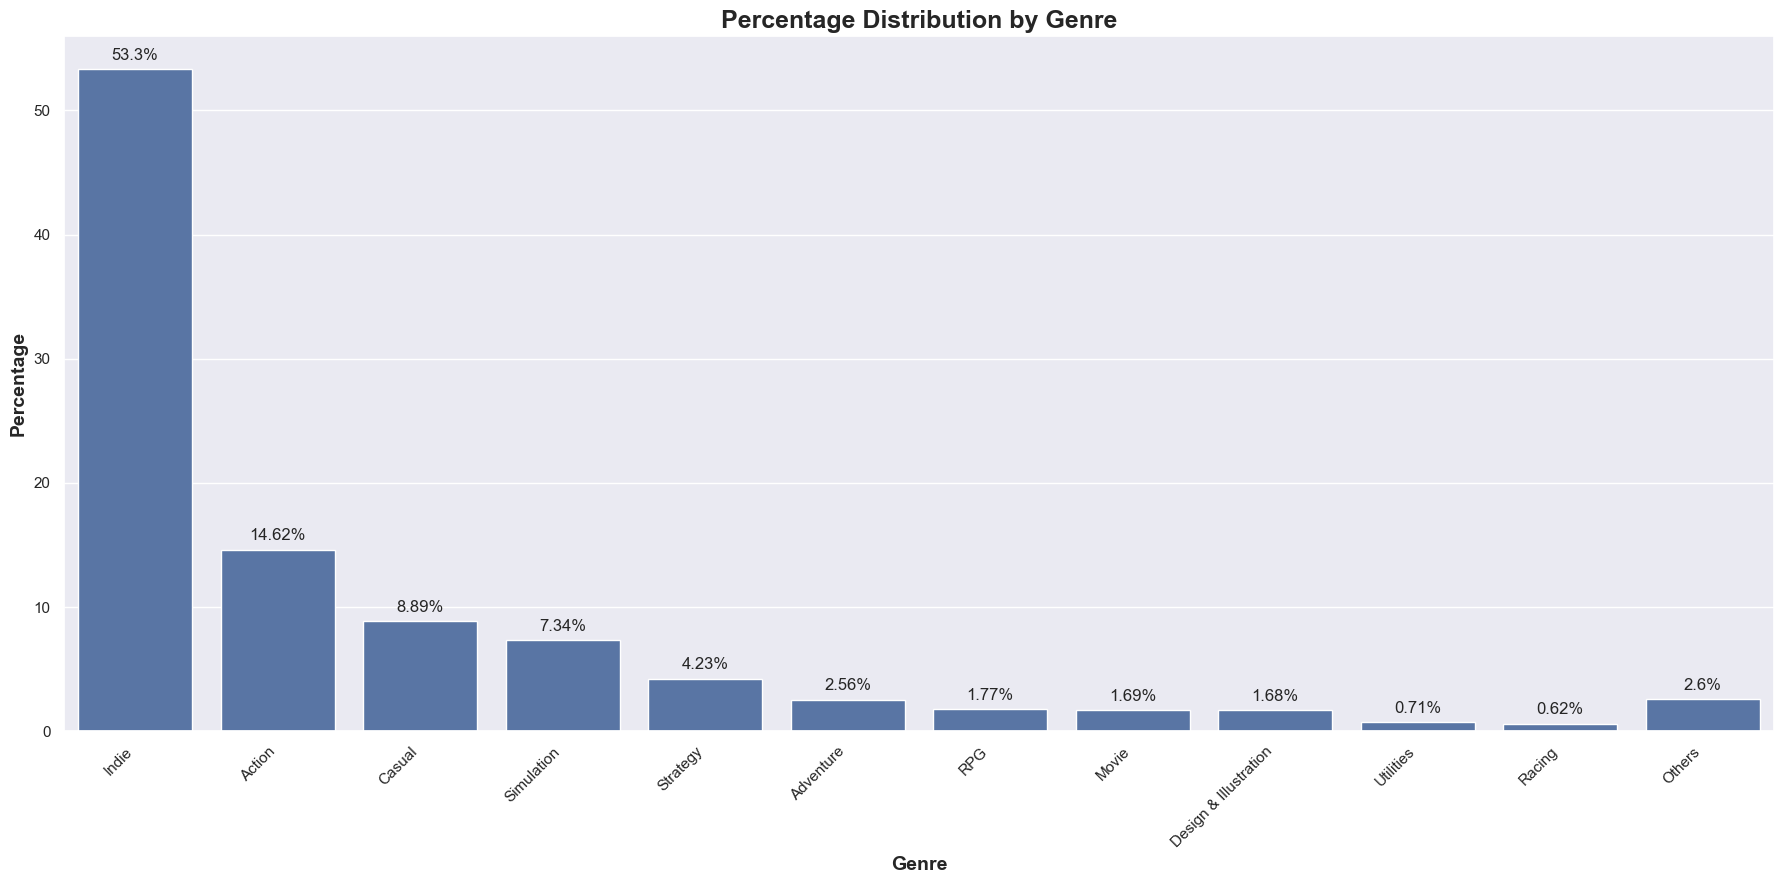

In [14]:
# Percentage Distribution
percentage_distribution = (filtered_genres / len(df_games)) * 100

# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),2)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Percentage Distribution by Genre', fontsize=18, fontweight='bold')
ax.set_xlabel('Genre', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()

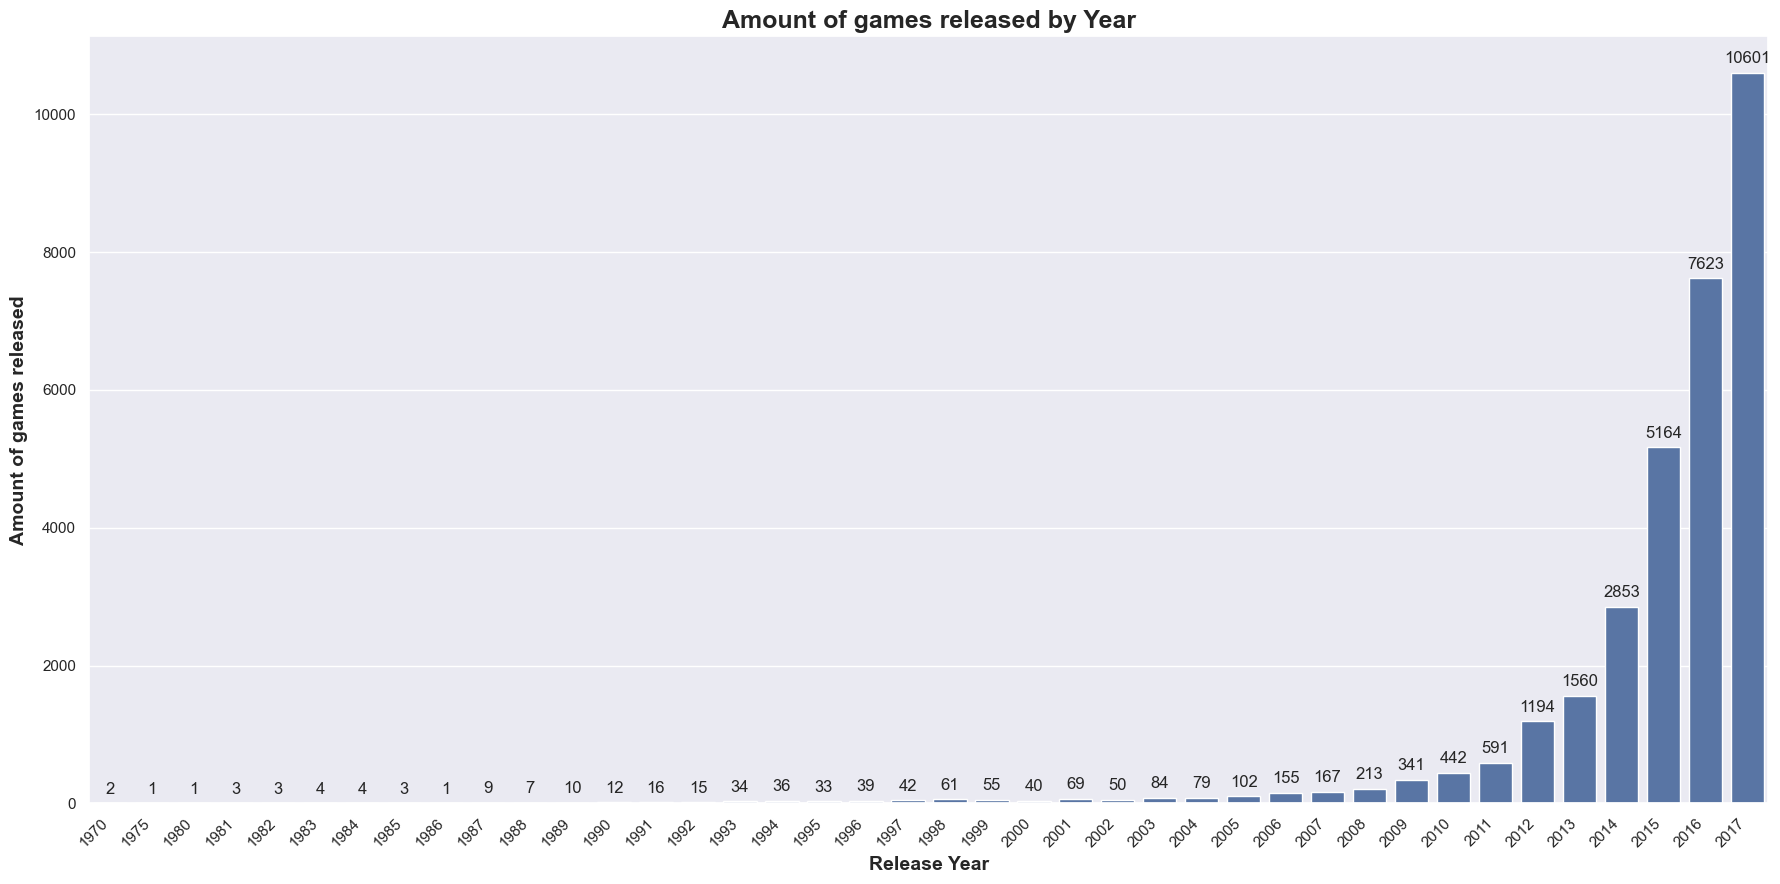

In [15]:
# We take into account until 2017 due to lack of data from the following years
df_games_2017 = df_games[df_games['release_year'] <= 2017]

# Amount of games released by year
releases_by_year = df_games_2017['release_year'].value_counts()

# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=releases_by_year.index, y=releases_by_year.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Amount of games released by Year', fontsize=18, fontweight='bold')
ax.set_xlabel('Release Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Amount of games released', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()

Developer feature

In [16]:
games_per_developer = df_games['developer'].value_counts()
games_per_developer.to_frame()

,count
developer,
Ubisoft - San Francisco,1259
"SmiteWorks USA, LLC",813
unknown,527
Dovetail Games,253
"KOEI TECMO GAMES CO., LTD.",232
...,...
Bobafetta,1
MNB,1
"ElVery333,Raquel Covelo Suarez,ATopeCode",1


In [17]:
# Cuantity of developers
num_developers = df_games['developer'].nunique()

print(f'There are {num_developers} different game developers')

There are 12726 different game developers


In [18]:
# Merging low-volume developers (under 175 games) into 'Others'
threshold = 10
filtered_developers = games_per_developer[games_per_developer >= threshold]
filtered_developers['Others'] = games_per_developer[games_per_developer < threshold].sum()

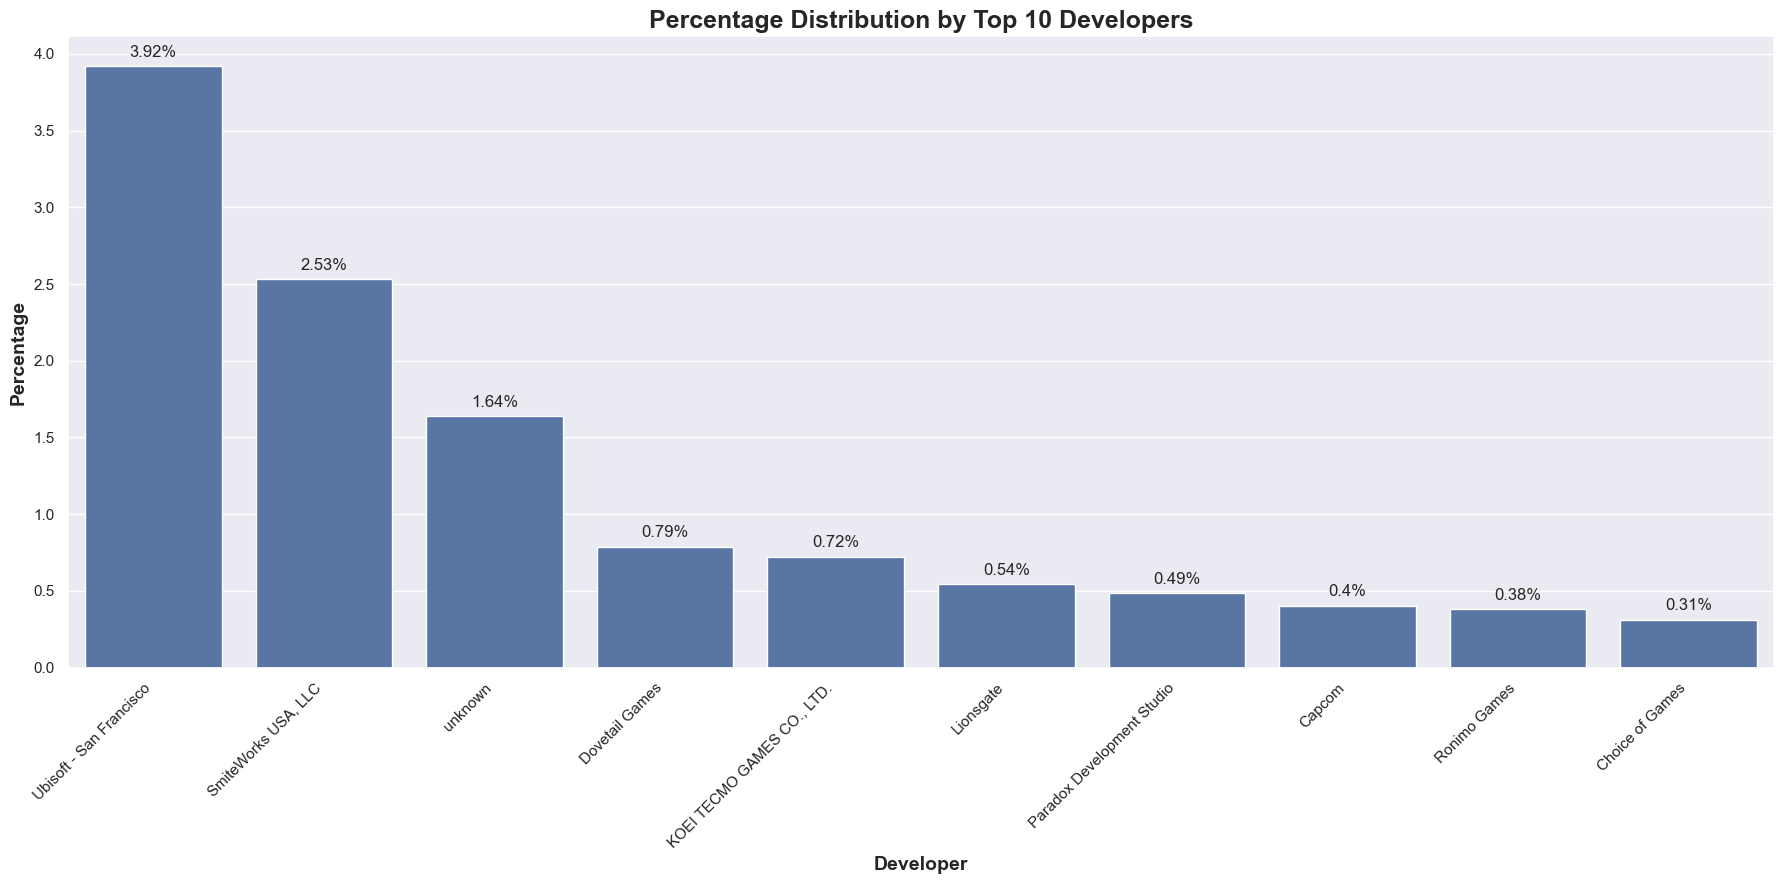

In [19]:
# Selecting top 10 developers 
top_10_developers = games_per_developer.head(10)

# Percentage Distribution for top 10 developers
percentage_distribution = (top_10_developers / len(df_games)) * 100

# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),2)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Percentage Distribution by Top 10 Developers', fontsize=18, fontweight='bold')
ax.set_xlabel('Developer', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()

In [20]:


# Definir los rangos
ranges = [1, 2, 21, 51, 101, 201, 501, 1001, float('inf')]

# Crear etiquetas para los rangos
labels = ['1', '2-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1000+']

# Categorizar los desarrolladores según el número de juegos
developer_counts_categories = pd.cut(games_per_developer, bins=ranges, labels=labels, right=False)

# Contar la cantidad de desarrolladores en cada categoría
developer_counts_by_category = developer_counts_categories.value_counts().sort_index()

print(developer_counts_by_category)


count
1           8478
2-20        4111
21-50        109
51-100        19
101-200        4
201-500        2
501-1000       2
1000+          1
Name: count, dtype: int64


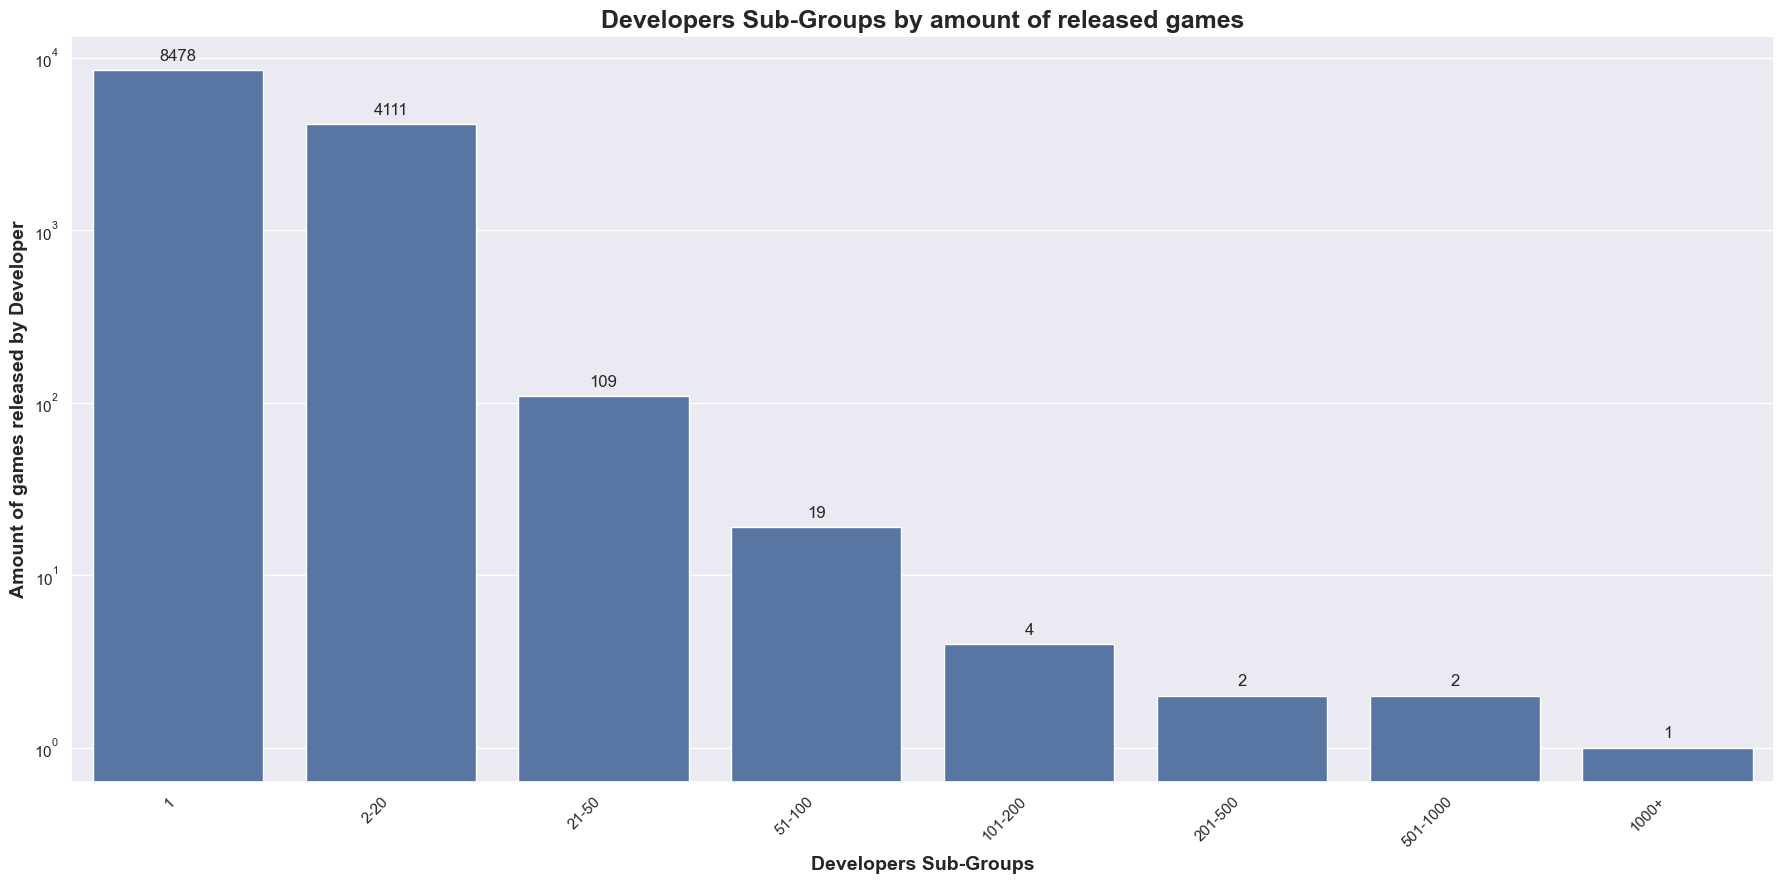

In [21]:
# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=developer_counts_by_category.index, y=developer_counts_by_category.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Developers Sub-Groups by amount of released games', fontsize=18, fontweight='bold')
ax.set_xlabel('Developers Sub-Groups', fontsize=14, fontweight='bold')
ax.set_ylabel('Amount of games released by Developer', fontsize=14, fontweight='bold')

plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()

In [22]:
most_active_developers = df_games[(df_games['release_year'] >= 2007) & (df_games['release_year'] <= 2017)]

num_developers = most_active_developers['developer'].nunique()

developer_names = most_active_developers['developer'].unique()

print(f"Amount of developers thet released games between 2007 y 2017: {num_developers}")
print("\nDevelopers:")
print(developer_names)

Amount of developers thet released games between 2007 y 2017: 12208

Developers:
['Poolians.com' '彼岸领域' 'FrozenPepper' ... 'rechargecomplete'
 'Samuel James Swartout' 'The Amiable']


# Items

In [21]:
df_items.head(3)

,user_id,item_id,title,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7


In [22]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094082 entries, 0 to 5094081
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           int64 
 2   title             object
 3   playtime_forever  int64 
dtypes: int64(2), object(2)
memory usage: 155.5+ MB


**Categorical variables**
- **item_name:** game title
- **user_id:** name of the application or game
- **item_id:** unique identifier of the game
- **item_name:** game title


item_name feature

In [20]:
n_items = df_items['title'].nunique()

print(f'There are {n_items} different items on the Steam dataset')

There are 10947 different items on the Steam dataset


In [23]:
# getting the number of users per game name
game = df_items["title"].value_counts() 
game

title
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43331
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

**The 2 most adquiered games are:**<br>

-**'Dota 2 Test':** 49136 users <br>
-**'Counter-Strike: Global Offensive':** 43331 users

**Numerical variables:**<br>

-**playtime forever:** number of hours played

In [24]:
df_items['playtime_forever'].describe().round(2)

count    5094082.00
mean         990.51
std         5414.10
min            0.00
25%            0.00
50%           34.00
75%          355.00
max       642773.00
Name: playtime_forever, dtype: float64

The average playtime is 990.5 hours per game. The 25% of the recorded playtimes are 0.The median playtime is 34 hours per game, meaning that 50% of the values are below this number and 50% are above. 75% of the recorded playtimes are 355 hours or less.

In [25]:
# Group by 'game_id' and sum the 'playtime_forever' for each game
playtime_per_game = df_items.groupby('title')['playtime_forever'].sum().reset_index()
playtime_per_game = playtime_per_game.sort_values(by='playtime_forever', ascending=False)
playtime_per_game

,title,playtime_forever
2117,Counter-Strike: Global Offensive,775784836
3944,Garry's Mod,441871026
9076,Terraria,152997644
9249,The Elder Scrolls V: Skyrim,134851450
10393,Warframe,122726853
...,...,...
10149,VRbloX,0
9506,The Room of Black & White,0
7962,See You Next Tuesday,0
1471,Button Frenzy,0


In [19]:
# Count how many items have playtime_forever equal to zero
items_with_zero_playtime = playtime_per_game[playtime_per_game['playtime_forever'] == 0]
number_of_items_with_zero_playtime = len(items_with_zero_playtime)

print(f"There are {number_of_items_with_zero_playtime} acquired games that have not been played by users")

There are 923 acquired games that have not been played by users


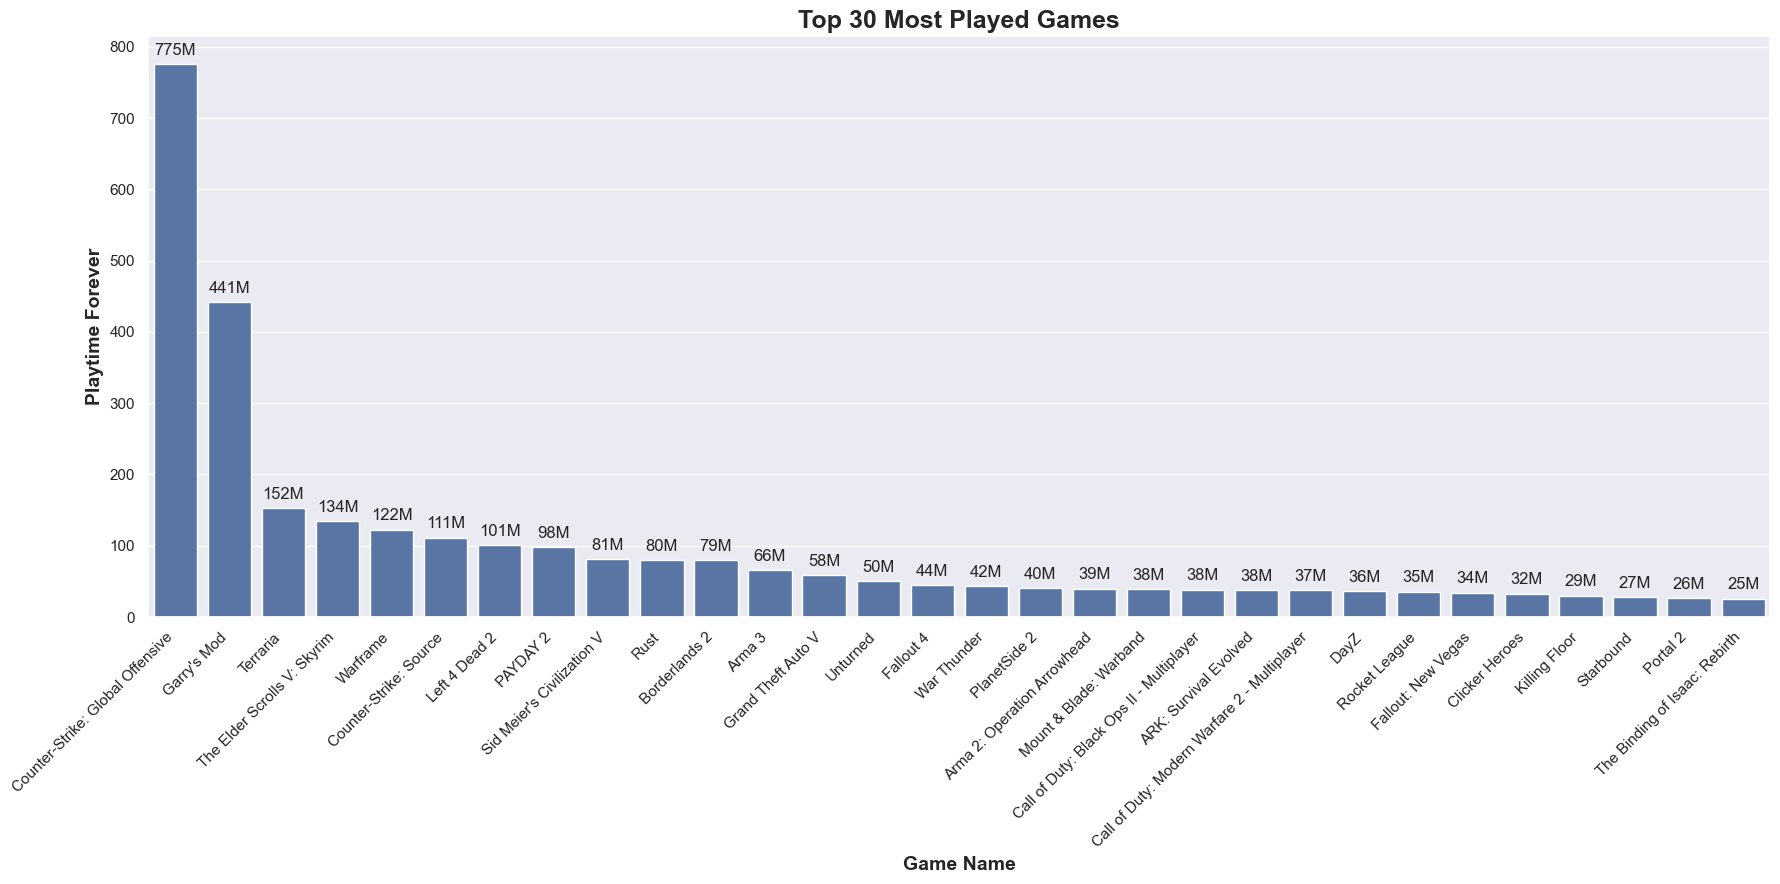

In [29]:
# Selecting top 30 most played games
top_30_most_played_games = playtime_per_game.sort_values(by='playtime_forever', ascending=False).head(30)

# Selecting top 30 most played games
top_30_most_played_games['playtime_forever'] = top_30_most_played_games['playtime_forever'].div(1000000)

# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=top_30_most_played_games['title'], y=top_30_most_played_games['playtime_forever'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Top 30 Most Played Games', fontsize=18, fontweight='bold')
ax.set_xlabel('Game Name', fontsize=14, fontweight='bold')
ax.set_ylabel('Playtime Forever', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The most played game is:** 'Counter-Strike: Global Offensive'

# Reviews

In [31]:
df_reviews.head(3)

,user_id,item_id,recommend,year_posted,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,2


In [32]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58431 non-null  object
 1   item_id             58431 non-null  int64 
 2   recommend           58431 non-null  bool  
 3   year_posted         58431 non-null  int64 
 4   sentiment_analysis  58431 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.8+ MB


**Categorical variables** <br>
- **user_id:** platform user identification <br>
- **recommend:** boolean value that indicates whether a review has been performed<br>
- **sentiment_analysis:** classification of reviews in:<br>
positive = 2<br>
negative = 0<br>
neutral = 1<br>

Recommend feature

In [59]:
# Number of recommendations made
n_recommend = df_reviews["recommend"].value_counts()
n_recommend

recommend
True     51692
False     6739
Name: count, dtype: int64

Sentiment Analisis feature

In [70]:
# sentiment_analisis categorical distribution 
sa_distribution = df_reviews["sentiment_analysis"].value_counts()
sa_distribution

sentiment_analysis
2    33053
1    12827
0    12551
Name: count, dtype: int64

- Positives reviews: 33053
- Neutral reviews: 12827
- Negative reviews: 12551

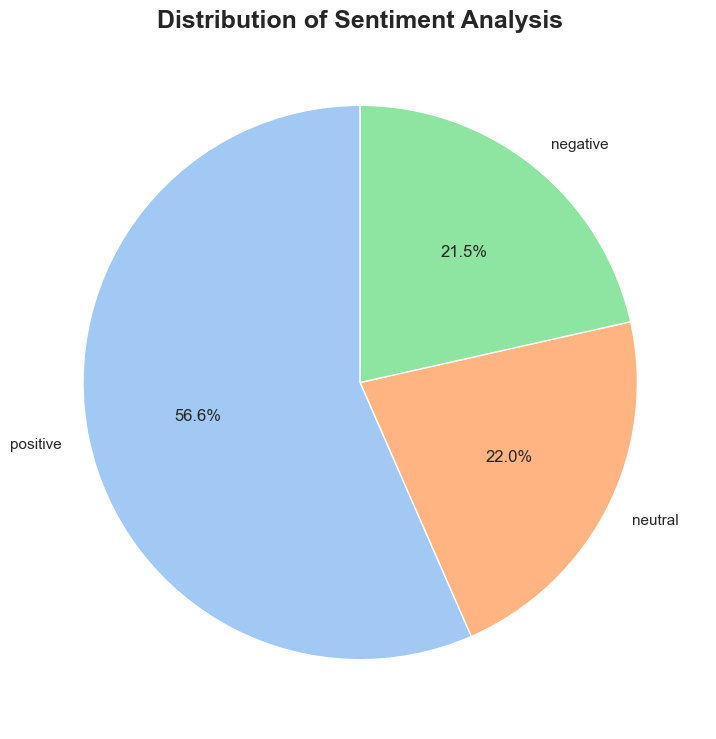

In [80]:
# Map the numbers to the corresponding labels
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
df_reviews['sentiment_analysis'] = df_reviews['sentiment_analysis'].map(sentiment_mapping)

# Count the occurrences of each feeling category
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(18, 9))

# Define colors for the pie chart
colors = sns.color_palette('pastel')[0:len(sentiment_counts)]

# Plot the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Distribution of Sentiment Analysis', fontsize=18, fontweight='bold')

plt.show()


Posted Year feature

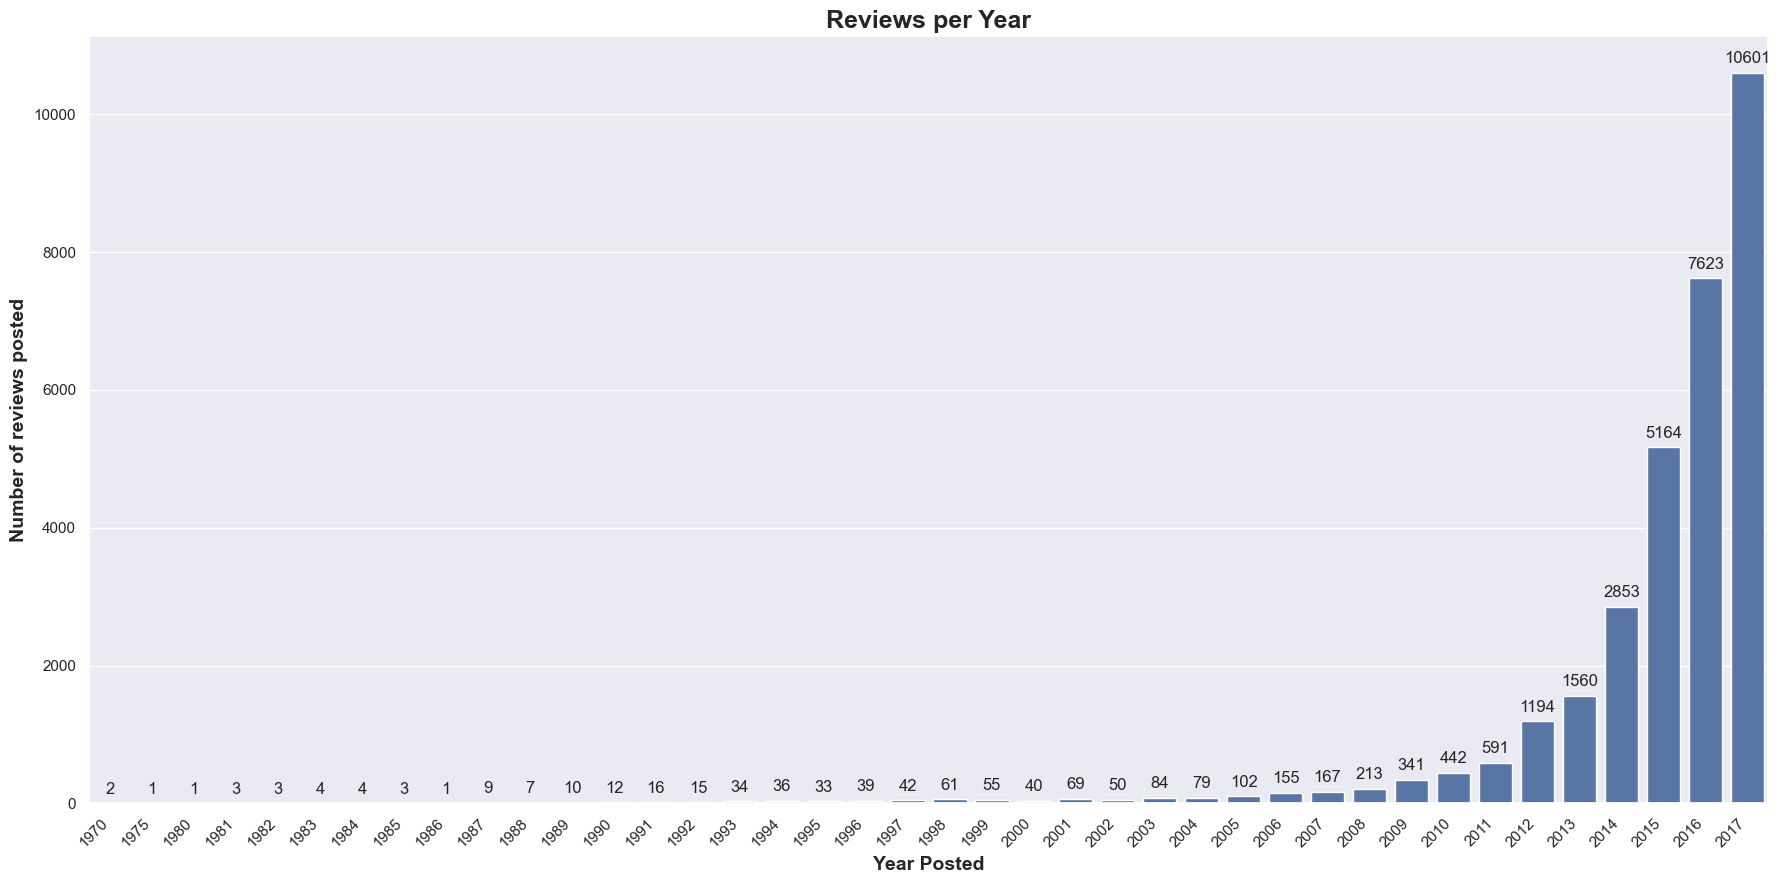

In [84]:
# Amount of gareviews posted by year
reviews_by_year = df_reviews['year_posted'].value_counts()

# (plot)
sns.set(style="darkgrid")

plt.figure(figsize=(18, 9))

ax = sns.barplot(x=releases_by_year.index, y=releases_by_year.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.set_title('Reviews per Year', fontsize=18, fontweight='bold')
ax.set_xlabel('Year Posted', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of reviews posted', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()


We see that the increase in reviews is proportional to the growth in the number of games released per year

# Users

In [33]:
df_users.head(3)

,user_id,items_count,steam_id,user_url
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric


In [34]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70912 entries, 0 to 70911
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      70912 non-null  object
 1   items_count  70912 non-null  int64 
 2   steam_id     70912 non-null  int64 
 3   user_url     70912 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [35]:
df_users['items_count'].describe()

count    70912.000000
mean        71.836671
std        132.366763
min          1.000000
25%         14.000000
50%         40.000000
75%         87.000000
max       7762.000000
Name: items_count, dtype: float64


Each user on average owns 72 games. <br>
25% own 14 games <br>
50% own 40 games<br> 
75% own 87 games<br>

In [36]:
n_users = df_users['user_id'].nunique()

print(f'There are {n_users} users on the Steam dataset')

There are 70912 users on the Steam dataset


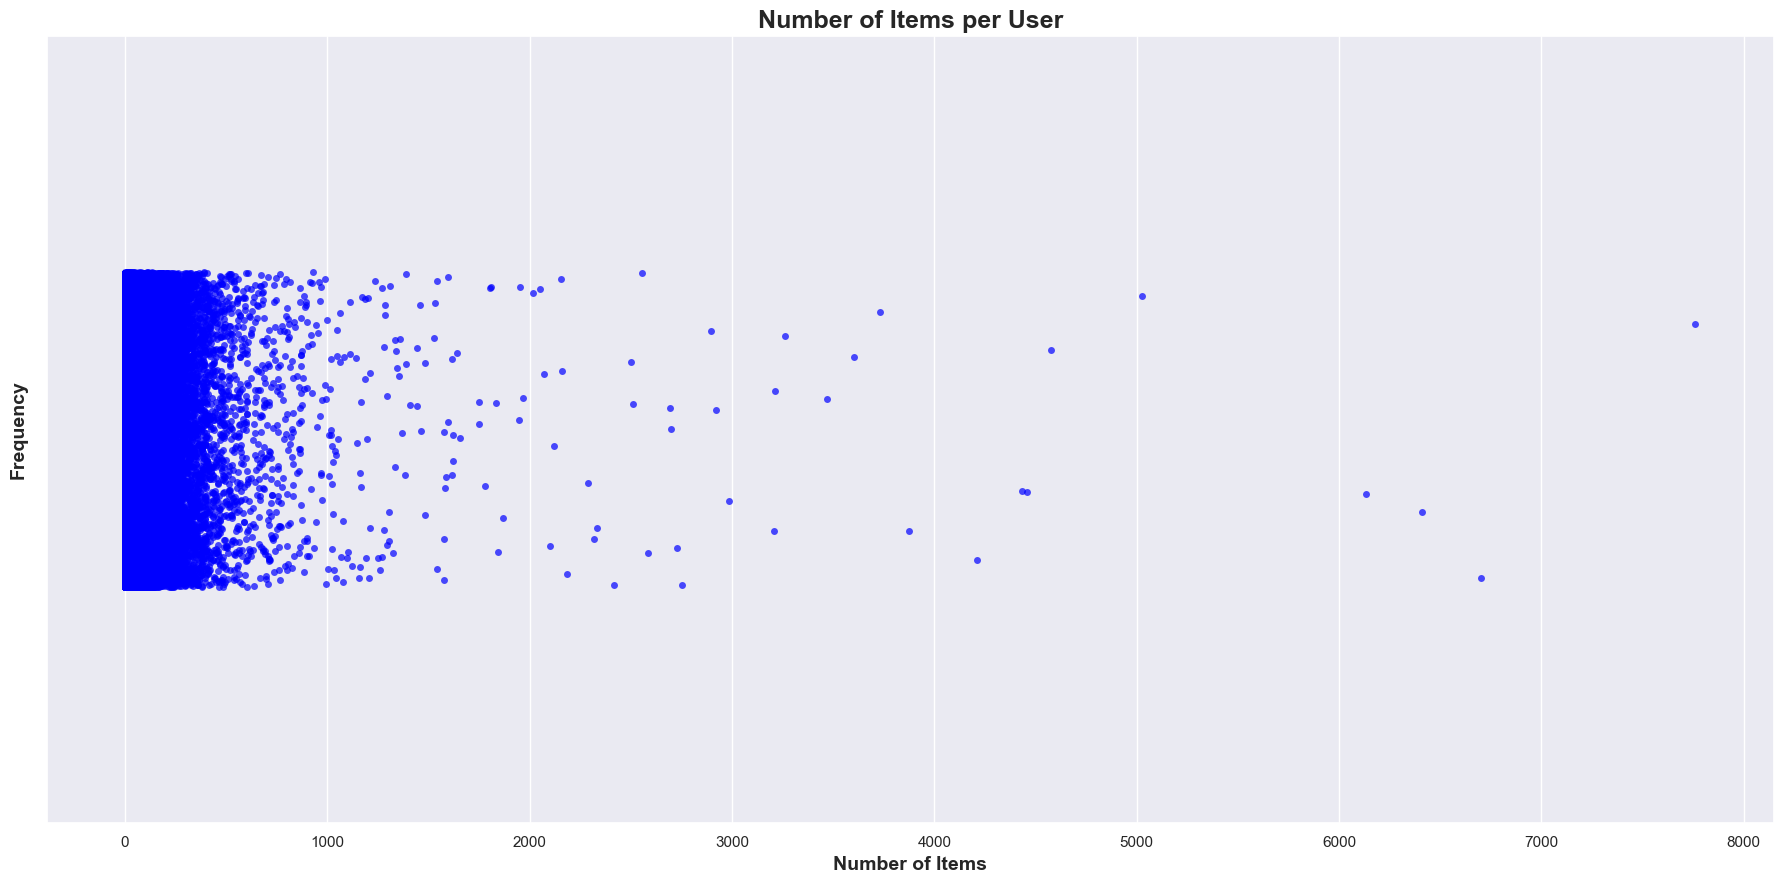

In [103]:
# Number of Games per User
items_count = df_users['items_count']
items_count = pd.DataFrame(items_count)
items_count = items_count.sort_values('items_count', ascending=False)

# We create a Stripplot to visualize the distribution of the number of items per user
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(18, 9))

sns.stripplot(data=items_count, x='items_count', color="blue", jitter=0.2, alpha=0.7)

ax.set_title('Number of Items per User', fontsize=18, fontweight='bold')
ax.set_xlabel('Number of Items', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')

plt.subplots_adjust(top=10, bottom=8)
plt.tight_layout()
plt.show()

 The graph shows that most users possessed between 0 and 1,000 articles. There is a small number of users who possessed more than 4,000 articles, and an even smaller number of users who possessed more than 7,000 articles.<br>

The graph also shows that the frequency of users who possess a certain number of articles decreases as the number of articles increases. This means that there are more users who possess a small number of articles than users who possess a large number of articles.<br>

Here are some possible conclusions that can be drawn from the analysis of this graph:<br>

- Most users of this platform possess a moderate number of articles.<br>
- There is a small number of users who are very active and possess a large number of articles.<br>
- It is possible that there is a limit on the number of articles that a user can possess.<br>

In [112]:
# Find the 'user_id' with the highest amount of items
max_items_user_info = df_users.loc[df_users['items_count'].idxmax(), ['user_id', 'items_count']]

# Extracting the values
max_items_user = max_items_user_info['user_id']
max_items_count = max_items_user_info['items_count']

print(f"User with the highest amount of items: {max_items_user}")
print(f"Number of items for this user: {max_items_count}")

User with the highest amount of items: phrostb
Number of items for this user: 7762


In [111]:
# Count how many users have only 1 item
users_with_one_item = (df_users['items_count'] == 1).sum()

print(f"Number of users with only 1 item: {users_with_one_item}")

Number of users with only 1 item: 3303


Optimization of DataFrames for API deployment

In [ ]:
# Merge playtime and genre data
playtime_genre = df_items[['item_id', 'user_id', 'playtime_forever']].merge(
    df_games[['item_id', 'genre', 'release_year']], on='item_id', how='inner')

# Rename columns in playtime_genre DataFrame
playtime_genre = playtime_genre.rename(
    columns={'playtime_forever': 'Horas', 'release_year': 'Año'})

# Removal of 'item_id' to save memory usage
playtime_genre = playtime_genre.drop('item_id', axis=1)

# Merge user reviews and game information
users_reviews = df_reviews[['item_id', 'recommend', 'year_posted', 'sentiment_analysis']].merge(
    df_games[['item_id', 'title', 'developer']], on='item_id', how='inner')

# Rename the 'year_posted' column in users_reviews DataFrame
users_reviews = users_reviews.rename(columns={'year_posted': 'Año'})

Export API datasets

In [ ]:
# Save playtime_genre DataFrame to Parquet format
playtime_genre.to_parquet('API/datasets_API/playtime_genre.parquet', index=False)

# Save users_reviews DataFrame to Parquet format
users_reviews.to_parquet('API/datasets_API/users_reviews.parquet', index=False)